Subo mi archivo de datos 'wisconsin_breast_cancer.csv' ahora:


Saving wisconsin_breast_cancer.csv to wisconsin_breast_cancer (5).csv
Archivo cargado con éxito.

--- 1. Contexto y descripción de los datos ---
Uso el dataset Breast Cancer Wisconsin, tomado de Kaggle, basado en estudios del Instituto de Patología de la Universidad de Wisconsin.
Es para Machine Learning de clasificación supervisada en diagnóstico médico.
Mi objetivo es limpiar los datos para encontrar patrones en tumores benignos y malignos.
Las preguntas que quiero responder son:
1. ¿Cuáles son las características más importantes para clasificar tumores?
2. ¿Hay alguna relación entre las características y si es benigno o maligno?

--- 2. Transformación inicial ---
Columnas después de quitar 'id': ['thickness', 'size', 'shape', 'adhesion', 'single', 'nuclei', 'chromatin', 'nucleoli', 'mitosis', 'class']

Tipos de datos iniciales:
thickness      int64
size           int64
shape          int64
adhesion       int64
single         int64
nuclei       float64
chromatin      int64
nucleoli  

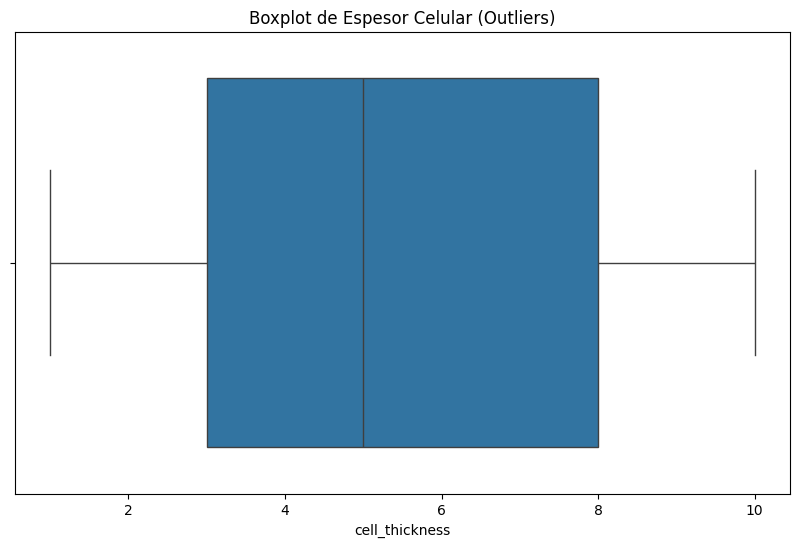


--- 9. Respuestas a mis preguntas ---

Correlaciones con 'class':
class                1.000000
bare_nuclei          0.756300
cell_shape           0.755177
cell_size            0.754380
bland_chromatin      0.704781
cell_thickness       0.671929
normal_nucleoli      0.636002
cell_adhesion        0.618088
single_epithelial    0.600130
mitoses              0.357504
Name: class, dtype: float64


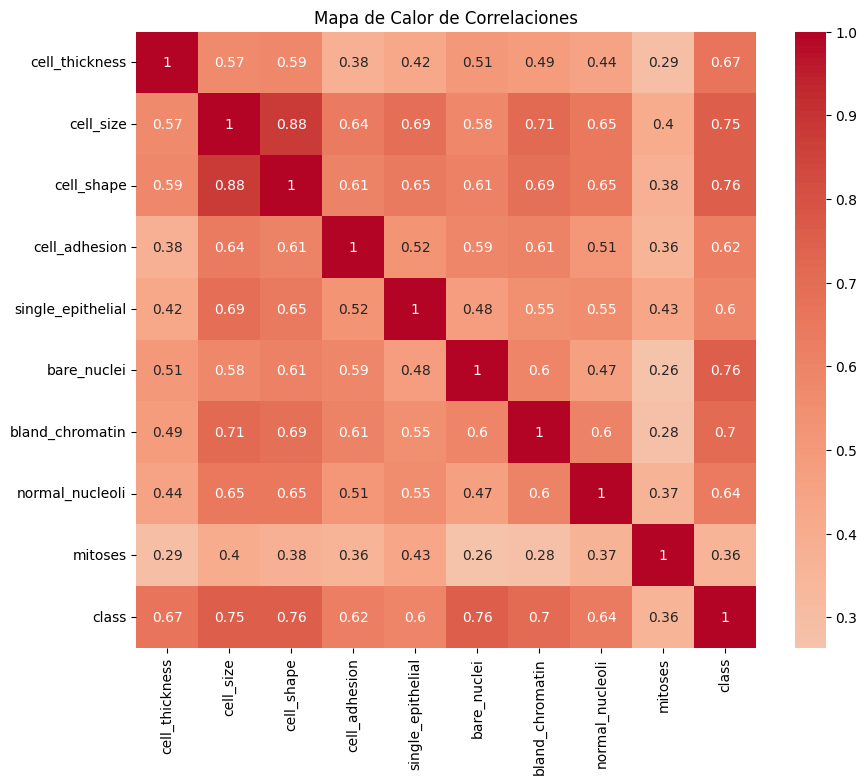

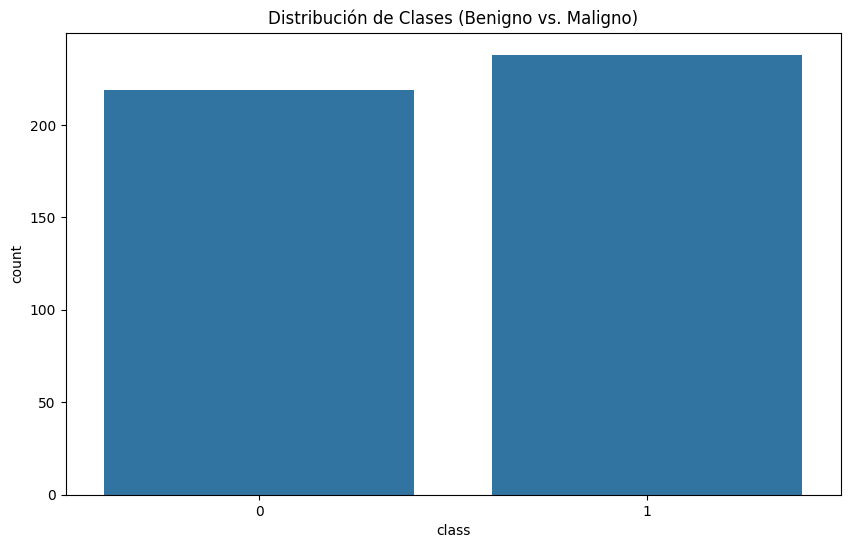

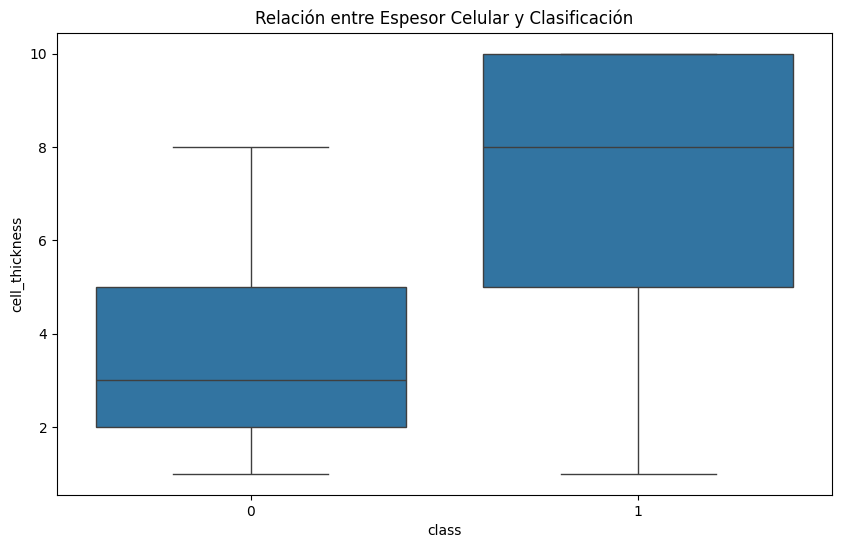


--- 10. Resultados ---
Empecé con 699 filas y ahora tengo 457 después de quitar duplicados.
Valores faltantes antes:
thickness     0
size          0
shape         0
adhesion      0
single        0
nuclei       16
chromatin     0
nucleoli      0
mitosis       0
class         0
dtype: int64
Valores faltantes después: Ninguno
Conclusión: Las características con mayor correlación son 'bare_nuclei', 'cell_shape' y 'cell_size'.
Guardo mi dataset limpio como 'breast_cancer_cleaned.csv'.


In [7]:
# Práctica #17: Avances del Proyecto Semana 7
# Creado por: Gabriela Gómez Ibarra
# Matrícula: MIA000624B_Presencial_250206
# Fecha: 12 de marzo de 2025
# Objetivo: Limpiar y transformar el dataset de cáncer de mama para analizar patrones y responder preguntas clave

# Importo las librerías que necesito
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargo el archivo manualmente desde mi computadora
print("Subo mi archivo de datos 'wisconsin_breast_cancer.csv' ahora:")
from google.colab import files
uploaded = files.upload()
data = pd.read_csv(next(iter(uploaded)))
print("Archivo cargado con éxito.")

# 1. Contexto y descripción de los datos
print("\n--- 1. Contexto y descripción de los datos ---")
print("Uso el dataset Breast Cancer Wisconsin, tomado de Kaggle, basado en estudios del Instituto de Patología de la Universidad de Wisconsin.")
print("Es para Machine Learning de clasificación supervisada en diagnóstico médico.")
print("Mi objetivo es limpiar los datos para encontrar patrones en tumores benignos y malignos.")
print("Las preguntas que quiero responder son:")
print("1. ¿Cuáles son las características más importantes para clasificar tumores?")
print("2. ¿Hay alguna relación entre las características y si es benigno o maligno?")

# 2. Empiezo transformando los datos
print("\n--- 2. Transformación inicial ---")
# Quito la columna 'id' porque no me sirve para predecir
data = data.drop(columns=['id'])
print("Columnas después de quitar 'id':", data.columns.tolist())

# Veo los tipos de datos que tengo
print("\nTipos de datos iniciales:")
print(data.dtypes)

# 3. Analizo los datos
print("\n--- 3. Análisis de los datos ---")
print("\nInformación general:")
print(data.info())
print("\nEstadísticas básicas:")
print(data.describe())

# cuento valores faltantes y duplicados
missing_values_before = data.isnull().sum()
print("\nValores faltantes antes de limpiar:")
print(missing_values_before)

duplicates_before = data.duplicated().sum()
print(f"\nRegistros duplicados antes de limpiar: {duplicates_before}")

# 4. Ajusto los tipos de datos
print("\n--- 4. Ajuste de tipos de datos ---")
# Convierto todo a numérico por si hay texto
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = pd.to_numeric(data[column], errors='coerce')
print("\nTipos de datos ajustados:")
print(data.dtypes)

# 5. Hago los nombres más claros
print("\n--- 5. Nombres más claros ---")
data.columns = ['cell_thickness', 'cell_size', 'cell_shape', 'cell_adhesion',
                'single_epithelial', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli',
                'mitoses', 'class']
print("\nNuevos nombres de columnas:")
print(data.columns.tolist())

# 6. Lleno los datos faltantes
print("\n--- 6. Llenado de datos faltantes ---")
# Uso la mediana para llenar los huecos
for column in data.columns:
    data[column] = data[column].fillna(data[column].median())
print("\nValores faltantes después de llenar:")
print(data.isnull().sum())

# 7. Quito los duplicados
print("\n--- 7. Eliminación de duplicados ---")
data_no_duplicates = data.drop_duplicates(keep='last')
duplicates_after = data_no_duplicates.duplicated().sum()
print(f"Registros duplicados después de limpiar: {duplicates_after}")
print(f"Filas antes: {len(data)}, Filas después: {len(data_no_duplicates)}")

# Actualizo el dataset
data = data_no_duplicates

# 8. Busco datos raros
print("\n--- 8. Datos raros (outliers) ---")
print("No tengo datos de tiempo en este dataset.")

# Función para encontrar outliers
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return len(outliers)

outlier_counts = {col: detect_outliers(data, col) for col in data.columns[:-1]}
print("\nCantidad de outliers por columna:")
for col, count in outlier_counts.items():
    print(f"{col}: {count}")

# Grafico los outliers de cell_thickness
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['cell_thickness'])
plt.title('Boxplot de Espesor Celular (Outliers)')
plt.savefig('boxplot_thickness.png')
plt.show()

# 9. Respondo mis preguntas
print("\n--- 9. Respuestas a mis preguntas ---")

# Pregunta 1: Características más importantes
correlations = data.corr()['class'].sort_values(ascending=False)
print("\nCorrelaciones con 'class':")
print(correlations)

# Mapa de calor de correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Mapa de Calor de Correlaciones')
plt.savefig('heatmap_correlations.png')
plt.show()

# Pregunta 2: Relación con la clasificación
# Distribución de clases
plt.figure(figsize=(10, 6))
sns.countplot(x=data['class'])
plt.title('Distribución de Clases (Benigno vs. Maligno)')
plt.savefig('class_distribution.png')
plt.show()

# Relación entre cell_thickness y class
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='cell_thickness', data=data)
plt.title('Relación entre Espesor Celular y Clasificación')
plt.savefig('thickness_vs_class.png')
plt.show()

# 10. Resultados
print("\n--- 10. Resultados ---")
print(f"Empecé con 699 filas y ahora tengo {len(data)} después de quitar duplicados.")
print("Valores faltantes antes:")
print(missing_values_before)
print("Valores faltantes después: Ninguno")
print("Conclusión: Las características con mayor correlación son 'bare_nuclei', 'cell_shape' y 'cell_size'.")

# Guardo mi dataset limpio
data.to_csv('breast_cancer_cleaned.csv', index=False)
print("Guardo mi dataset limpio como 'breast_cancer_cleaned.csv'.")